In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('BankChurners - BankChurners.csv')
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [3]:
print(f'No of rows are {df.shape[0]}')
print(f'No of columns are {df.shape[1]}')

No of rows are 10127
No of columns are 21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
# Check for missing or incorrect data and handle it appropriately.
# df['count_of_trans'] = df['count_of_trans'].fillna(0)
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
bins = [20,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['age_group'] =pd.cut(df['Customer_Age'],bins = bins ,labels=labels,right = True)
df['age_group'].unique()

['40-50', '50-60', '30-40', '60-70', '70-80', '20-30']
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Create at least 3 different visualizations that help in understanding the relationships between features.



<Axes: xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

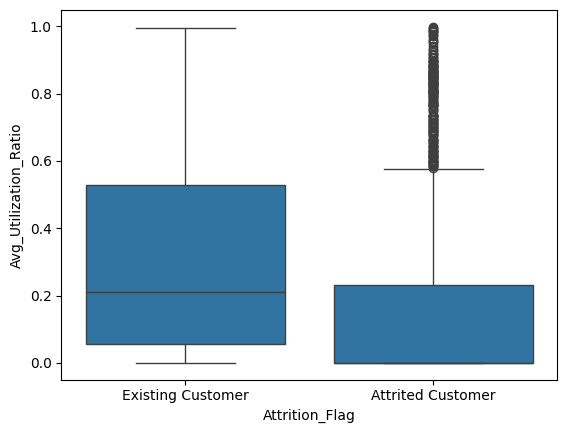

In [7]:
sns.boxplot(x = 'Attrition_Flag', y ='Avg_Utilization_Ratio',data = df)

In [8]:
attrited = df[['Total_Trans_Ct','Months_on_book']]
attrited.corr()

,Total_Trans_Ct,Months_on_book
Total_Trans_Ct,1.000000,-0.049819
Months_on_book,-0.049819,1.000000


In [9]:
charges = df[['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1']]
charges.corr()

,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1
Total_Amt_Chng_Q4_Q1,1.000000,0.384189
Total_Ct_Chng_Q4_Q1,0.384189,1.000000


In [10]:
age = df[['Dependent_count','Customer_Age']]
age.corr()

,Dependent_count,Customer_Age
Dependent_count,1.000000,-0.122254
Customer_Age,-0.122254,1.000000


In [11]:
transactions = df[['Months_on_book','Total_Trans_Amt']]
transactions.corr()

,Months_on_book,Total_Trans_Amt
Months_on_book,1.000000,-0.038591
Total_Trans_Amt,-0.038591,1.000000


Create at least 3 different visualizations that help in understanding the relationships between features.


  age_group  Total_Trans_Ct
0     20-30             265
1     30-40            2132
2     40-50            4652
3     50-60            2673
4     60-70             404
5     70-80               1


C:\Users\USER\AppData\Local\Temp\ipykernel_8128\4094790676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_trasactions_by_age_group = df.groupby('age_group')['Total_Trans_Ct'].size().reset_index()


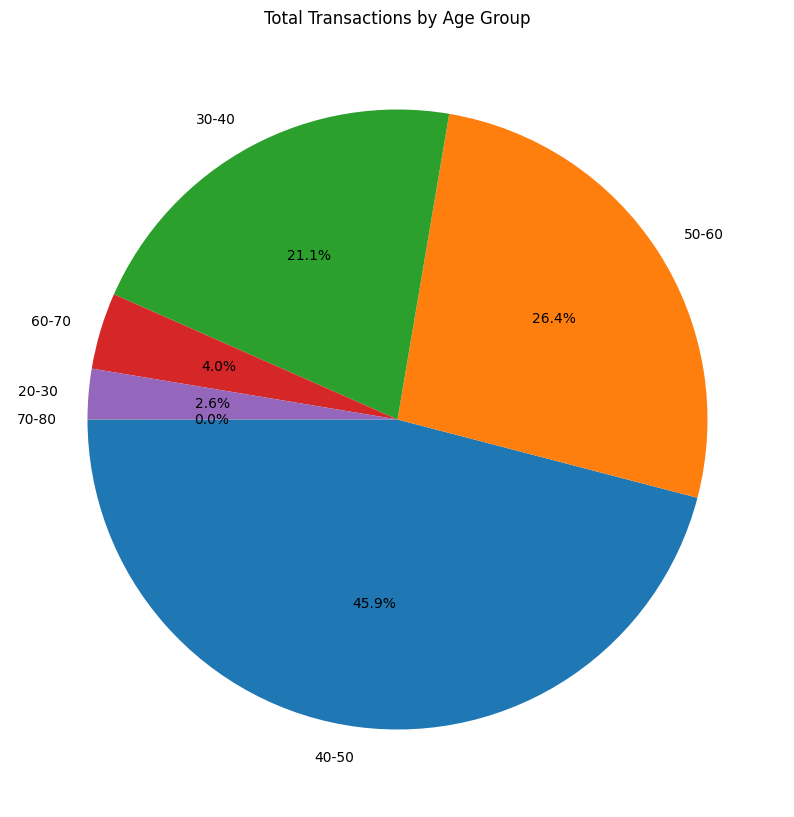

In [12]:

total_trasactions_by_age_group = df.groupby('age_group')['Total_Trans_Ct'].size().reset_index()
print(total_trasactions_by_age_group)
plt.figure(figsize=(10,13))
total_trasactions_by_age_group=total_trasactions_by_age_group.sort_values(by='Total_Trans_Ct',ascending=False)
plt.pie(total_trasactions_by_age_group['Total_Trans_Ct'], 
        labels=total_trasactions_by_age_group['age_group'], 
        autopct='%1.1f%%', 
        startangle=180)

# Add a title
plt.title('Total Transactions counts  by Age Group')

# Display the pie chart
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8128\1062062105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_trasactions_amt_by_age_group = df.groupby('age_group')['Total_Trans_Amt'].sum().reset_index()


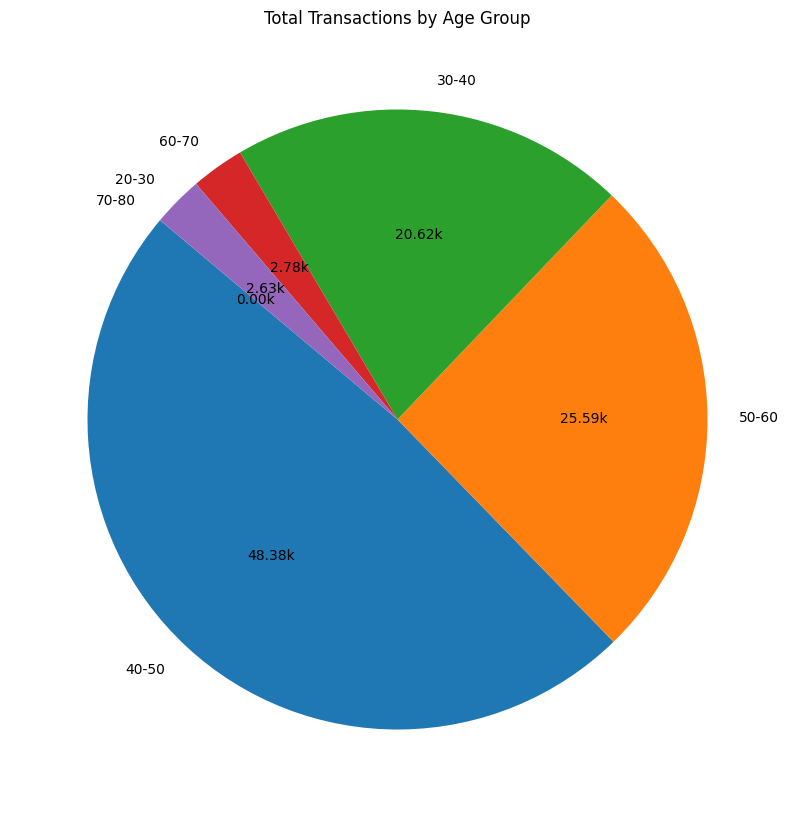

In [13]:
total_trasactions_amt_by_age_group = df.groupby('age_group')['Total_Trans_Amt'].sum().reset_index()
total_trasactions_amt_by_age_group['Total_Trans_Amt'] = round((total_trasactions_amt_by_age_group['Total_Trans_Amt']/100000),2)
plt.figure(figsize=(10,13))
def func(pct, allvals):
    absolute = round(pct/100. * sum(allvals), 2)
    return "{:.2f}k".format(pct, absolute)
total_trasactions_amt_by_age_group=total_trasactions_amt_by_age_group.sort_values(by='Total_Trans_Amt',ascending=False)
plt.pie(total_trasactions_amt_by_age_group['Total_Trans_Amt'], 
        labels=total_trasactions_amt_by_age_group['age_group'],
        autopct=lambda pct: func(pct, total_trasactions_amt_by_age_group['Total_Trans_Amt']),
        startangle=140)

# Add a title
plt.title('Total Transactions by Age Group')

# Display the pie chart
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8128\3413728673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'Education_Level',y = 'Total_Trans_Amt',data = education_vise_trans,palette='viridis')


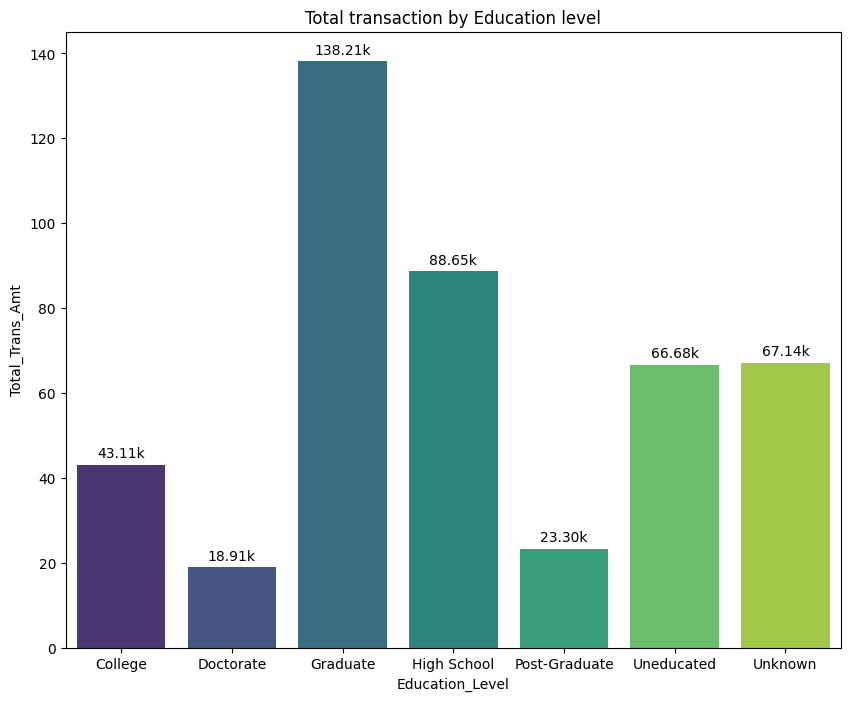

In [23]:
education_vise_trans = df.groupby('Education_Level')['Total_Trans_Amt'].sum().reset_index()
education_vise_trans['Total_Trans_Amt'] = round((education_vise_trans['Total_Trans_Amt']/100000),2)
plt.figure(figsize=(10,8))
ax = sns.barplot(x = 'Education_Level',y = 'Total_Trans_Amt',data = education_vise_trans,palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}k',  # Display height value with 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position label on top of the bar
                ha='center', va='center', xytext=(0, 8),  # Set text alignment and position offset
                textcoords='offset points')
plt.title('Total transaction by Education level')
plt.show()

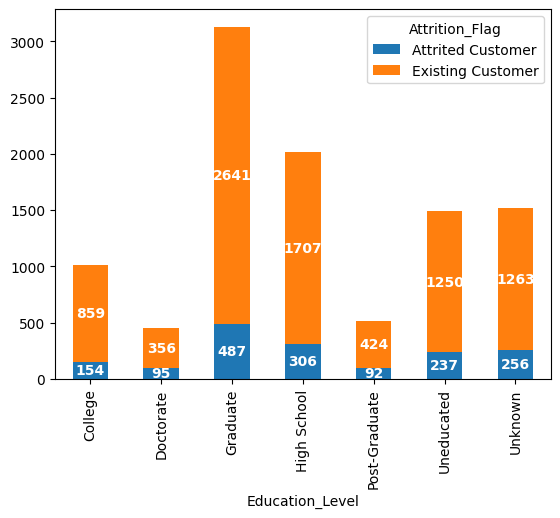

In [15]:
gender_wise = df.groupby(['Education_Level','Attrition_Flag']).size().unstack().reset_index()
gender_wise = gender_wise.set_index('Education_Level')
ax = gender_wise.plot(kind='bar',stacked=True)
for p in ax.patches:
    width = p.get_width()  # Width of the bar
    height = p.get_height()  # Height of the bar
    x, y = p.get_xy()  # Bottom left corner of the bar
    
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=10, color='white', weight='bold')
plt.title('Total attrition counts by education level')
plt.show()

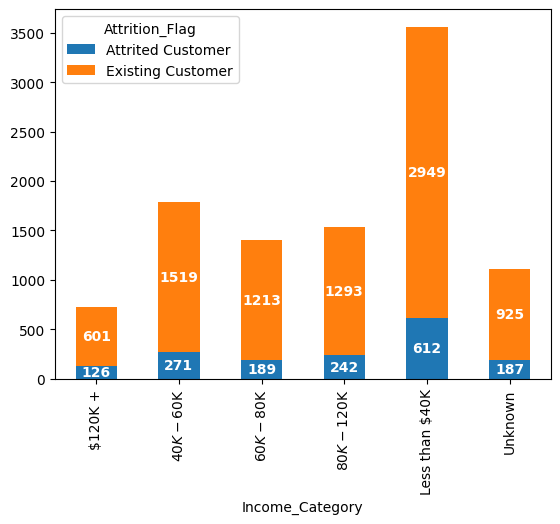

In [16]:
income = df.groupby(['Income_Category','Attrition_Flag']).size().unstack().reset_index()
income = income.set_index('Income_Category')

ax = income.plot(kind = 'bar',stacked=True)
for p in ax.patches:
    width = p.get_width()  # Width of the bar
    height = p.get_height()  # Height of the bar
    x, y = p.get_xy()  # Bottom left corner of the bar
    
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=10, color='white', weight='bold')
plt.title('total attrition count by income category')
plt.show()

In [17]:
card = df.groupby(['Card_Category','Attrition_Flag']).size().unstack().reset_index()
card

Attrition_Flag,Card_Category,Attrited Customer,Existing Customer
0,Blue,1519,7917
1,Gold,21,95
2,Platinum,5,15
3,Silver,82,473


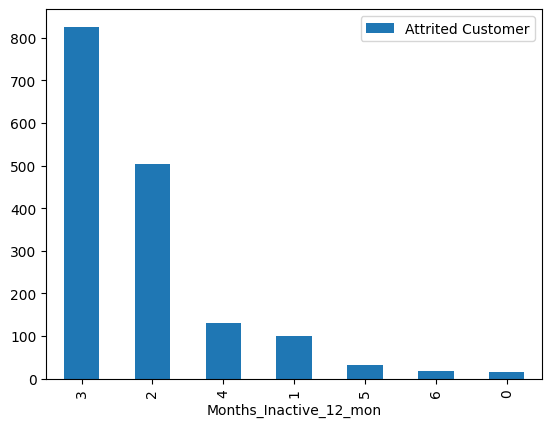

Attrition_Flag  Months_Inactive_12_mon  Attrited Customer  Existing Customer
3                                    3                826               3020
2                                    2                505               2777
4                                    4                130                305
1                                    1                100               2133
5                                    5                 32                146
6                                    6                 19                105
0                                    0                 15                 14


In [18]:
months_inactive = df.groupby(['Months_Inactive_12_mon','Attrition_Flag']).size().unstack().reset_index()
# months_inactive = months_inactive.set_index('Months_Inactive_12_mon')
months_inactive = months_inactive.sort_values(by = 'Attrited Customer',ascending=False)
# months_inactive.columns = ['Months_Inactive_12_mon','Attrited Customer']

# months_inactive
months_inactive.plot(kind='bar',x = 'Months_Inactive_12_mon',y = 'Attrited Customer')
plt.show()
print(months_inactive)

In [19]:
df['Months_on_book'].unique()
bins = [10,20,30,40,50,60]
label = ['10-20','20-30','30-40','40-50','50-60']
df['Months_onboard'] = pd.cut(df['Months_on_book'],bins = bins,labels=label)


C:\Users\USER\AppData\Local\Temp\ipykernel_8128\1208554867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  months = df.groupby(['Months_onboard','Attrition_Flag']).size().unstack().reset_index()


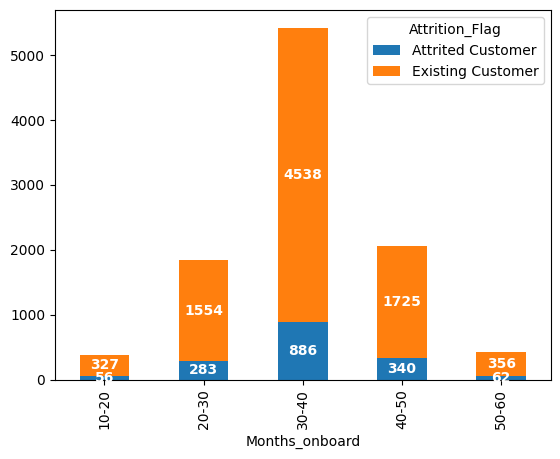

In [20]:
months = df.groupby(['Months_onboard','Attrition_Flag']).size().unstack().reset_index()
months =months.set_index('Months_onboard')
ax = months.plot(kind = 'bar',stacked=True)
for p in ax.patches:
    width = p.get_width()  # Width of the bar
    height = p.get_height()  # Height of the bar
    x, y = p.get_xy()  # Bottom left corner of the bar
    
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=10, color='white', weight='bold')
plt.show()

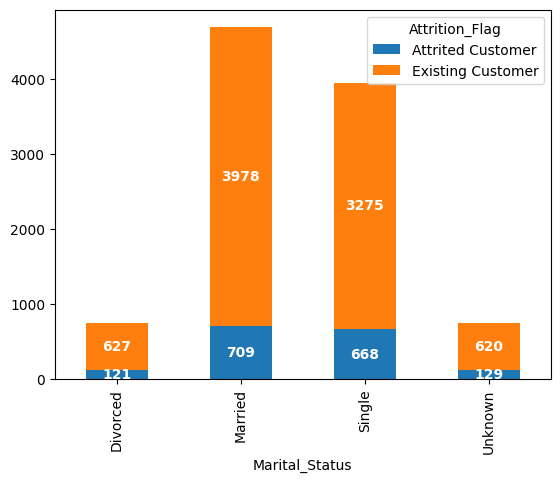

In [21]:
custo_attri = df.groupby(['Marital_Status','Attrition_Flag']).size().unstack().reset_index()
custo_attri  = custo_attri.set_index('Marital_Status')
ax =custo_attri.plot(kind = 'bar',stacked=True)
for p in ax.patches:
    width = p.get_width()  # Width of the bar
    height = p.get_height()  # Height of the bar
    x, y = p.get_xy()  # Bottom left corner of the bar
    
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=10, color='white', weight='bold')
plt.title('total attrition and existance count by marital status')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8128\2737321252.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trans_count =attrited.groupby(['count_of_trans','Attrition_Flag']).size().unstack().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_8128\2737321252.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trans_count,x = 'count_of_trans',y= 'Attrited Customer',palette='viridis')


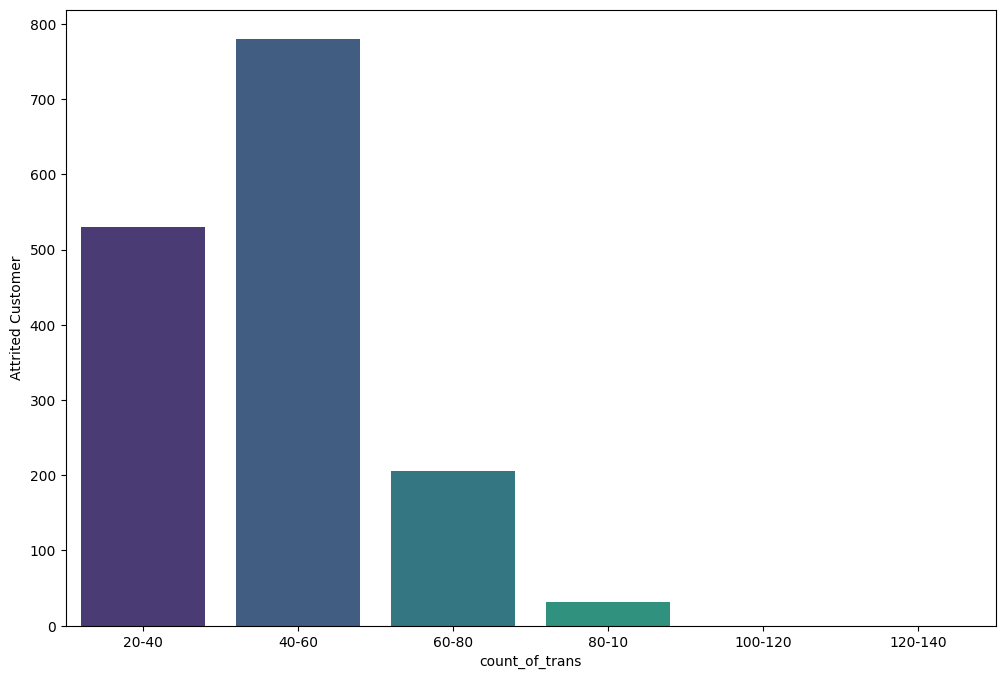

In [24]:
attrited = df[df['Attrition_Flag']=='Attrited Customer']
df['Total_Trans_Ct'].unique()
bins = [20,40,60,80,100,120,140]
label = ['20-40','40-60','60-80','80-10','100-120','120-140']
df['count_of_trans'] = pd.cut(df['Total_Trans_Ct'],bins = bins,labels=label)
trans_count =attrited.groupby(['count_of_trans','Attrition_Flag']).size().unstack().reset_index()
trans_count = trans_count.sort_values(by = 'Attrited Customer',ascending=False)
# trans_count=trans_count.set_index('count_of_trans')

plt.figure(figsize=(12,8))
sns.barplot(data=trans_count,x = 'count_of_trans',y= 'Attrited Customer',palette='viridis')
plt.title('total attrition count by transactions count')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4732\2979165450.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limits = df.groupby(['credit_limit_in_k','Attrition_Flag']).size().unstack().reset_index()


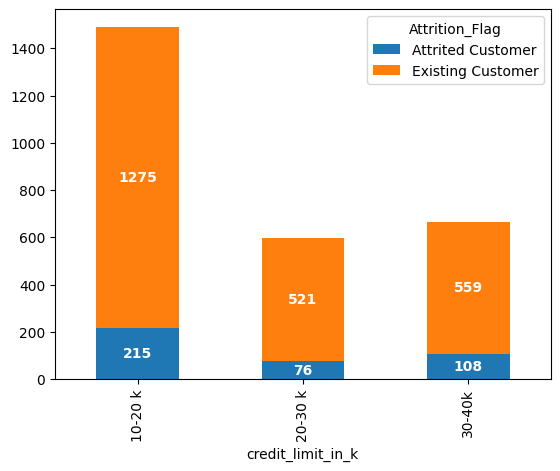

In [58]:
bins = [10000,20000,30000,40000]
labels = ['10-20 k','20-30 k','30-40k']
df['credit_limit_in_k'] = pd.cut(df['Credit_Limit'],bins =bins,labels= labels)
df['credit_limit_in_k'].unique()
limits = df.groupby(['credit_limit_in_k','Attrition_Flag']).size().unstack().reset_index()
limits = limits.set_index('credit_limit_in_k')
ax = limits.plot(kind='bar',stacked=True)
for p in ax.patches:
    width = p.get_width()  # Width of the bar
    height = p.get_height()  # Height of the bar
    x, y = p.get_xy()  # Bottom left corner of the bar
    
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', 
                ha='center', va='center', fontsize=10, color='white', weight='bold')
plt.title('total attrition and existance count by credit limit of customers')
plt.show()

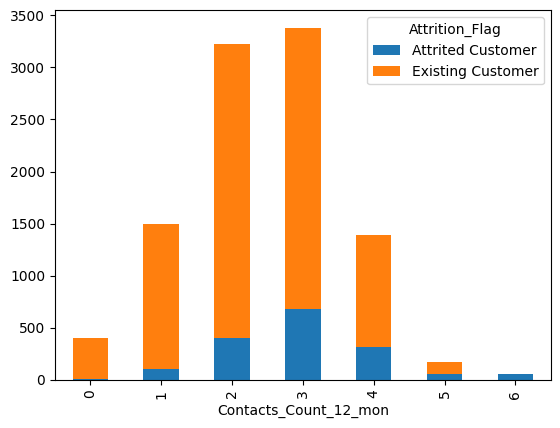

In [25]:
contacts =df.groupby('Contacts_Count_12_mon')['Attrition_Flag'].value_counts().unstack().reset_index()
contacts=contacts.set_index('Contacts_Count_12_mon')
contacts.plot(kind = 'bar',stacked=True)
plt.show()

Statistical Analysis:
Compute basic statistical measures (mean, median, mode, standard deviation) for relevant features.


In [59]:
# Compute basic statistical measures (mean, median, mode, standard deviation) for relevant features.
print(df['Customer_Age'].mean())
print(df['Customer_Age'].mode()[0])
print(df['Customer_Age'].median())
print('---')
print(df['Months_on_book'].mean())
print(df['Months_on_book'].mode()[0])
print(df['Months_on_book'].median())
print('---')
print(df['Months_Inactive_12_mon'].mean())
print(df['Months_Inactive_12_mon'].mode()[0])
print(df['Months_Inactive_12_mon'].median())
print('---')
print(df['Credit_Limit'].mean())
print(df['Credit_Limit'].mode()[0])
print(df['Credit_Limit'].median())
print('---')
print(df['Total_Trans_Amt'].mean())
print(df['Total_Trans_Amt'].mode()[0])
print(df['Total_Trans_Amt'].median())
print('---')
print(df['Total_Trans_Ct'].mean())
print(df['Total_Trans_Ct'].mode()[0])
print(df['Total_Trans_Ct'].median())



46.32596030413745
44
46.0
---
35.928409203120374
36
36.0
---
2.3411671768539546
3
2.0
---
8631.953698034955
34516.0
4549.0
---
4404.086303939963
4253
3899.0
---
64.85869457884863
81
67.0
